In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.mlab as mpll
import matplotlib as mpl
import pathlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.stats import chi2_contingency
from scipy import signal as sp
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from scipy import stats as st
import statistics
import math
from scipy.stats import chi2
from scipy.interpolate import UnivariateSpline # para interpolar
from scipy.signal import find_peaks
plt.rcParams["font.family"] = "serif"
from google.colab import files

# E/L vs L

De la ecuación para la frecuencia $\omega_n$ = $\sqrt{\frac{IE}{\rho} k_n^4 - \alpha^2}$ despejamos $E = \frac{(\omega_n^2 + \alpha^2)}{I L k_n^4} m \pi (\frac{d}{2})^2 $. Entonces si queremos plotear una lineal, cuya pendiente nos de E en función de las longitudes de la varilla los ejes deberán ser: $x = L$ e $y = \frac{(\omega_n^2 + \alpha^2)}{I k_n^4} m \pi (\frac{d}{2})^2 $

In [2]:
#x_cobre = np.array([29.2, 25.6, 23.5, 17.7, 13.0]) /100 #longitudes de la varilla de cobre en metros
x_cobre = np.array([29.2, 25.6, 23.5, 17.7, 13.0]) #longitudes de la varilla de cobre en cm
y_cobre = np.array([91.77133799875648, 96.74211353981278, 101.61360123436677, 107.40628343180688,  119.3951186347018]) #E que calculamos / longitud de la medición

#x_cobre_error = 0.1 / 100 #error de la cinta métrica en metros
x_cobre_error = 0.1  #error de la cinta métrica en cm
# y_cobre_error = np.array([ 1.5 , 1.73, 1.93, 2.58, 1.0 ])
y_cobre_error = np.array([ 1.6927628039977152 , 1.7331694746658763, 1.9395475775841384, 2.6016315915756714, 3.8362029025942785 ])


x_acero = np.array([ 37.0, 30.0, 30.0]) / 100 #longitudes de la varilla de acero en metros
y_acero = np.array([ 143.54, 164.15, 165.45  ])

x_acero_error = 0.1 / 100 #error de la cinta métrica en metros
y_acero_error = np.array([8.26, 11.78, 11.78  ])

Cobre

71.32953659052575
3.952684164361514
Chi-cuadrado (χ²): 3.1356
Chi-cuadrado reducido (χ²/ν): 1.0452
p-valor: 0.3712


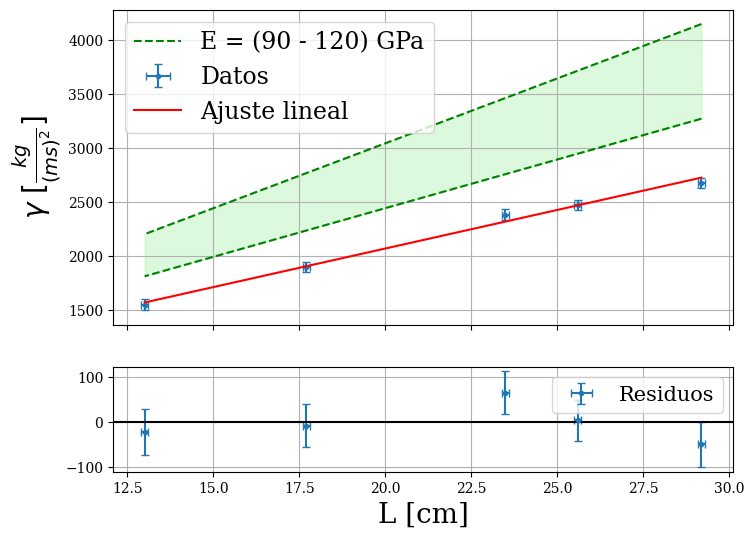

In [26]:
#Propagación del error en y: E*L

def error_eje_y(E, error_E, longitud, error_longitud):
  return ((error_E *longitud)**2 + (E*error_longitud)**2)**(1/2)

def lineal(x, m, b):
    return m * x + b



x1 = x_cobre
y1 = y_cobre * x_cobre
xerr1 = x_cobre_error
yerr1 = error_eje_y(y_cobre, y_cobre_error, x_cobre, x_cobre_error)

p_opt1, p_cov1 = curve_fit(lineal, x1, y1, sigma = yerr1)
m_optimo1 = p_opt1[0]
b_optimo1 = p_opt1[1]
b_error1 = p_cov1[1,1]**0.5
m_error1 = p_cov1[0,0]**0.5

m_optimo1, m_error1 #pendiente y error

y_predicho1 = lineal(x1,np.array(m_optimo1),np.array(b_optimo1)) #lineal
residuos1 = y1 - y_predicho1
y_predicho_error1 = np.array(m_error1, b_error1)
error_residuos1 = (yerr1**2 + y_predicho_error1**2)**(1/2)

# Cálculo del Chi-cuadrado
chi2_valor = np.sum((residuos1 / yerr1) ** 2)
dof = len(x1) - len(p_opt1)  # Grados de libertad
chi2_reducido = chi2_valor / dof
p_valor = chi2.sf(chi2_valor, dof)

#Curva teorica
E_latón_max = 120 #Modulo de Young Máximo tabulado para el laton
y_teorica_max = E_latón_max * x1 + b_optimo1

E_latón_min = 90 #Modulo de Young Mínimo tabulado para el laton
y_teorica_min = E_latón_min * x1 + b_optimo1

"""
x0 = np.array([0])  # punto x = 0
print("ord origen ajuste", lineal(x0, m_optimo1, b_optimo1))
print("ord origen max", lineal(x0, E_latón_max, b_optimo1))
print("ord origen min", lineal(x0, E_latón_min, b_optimo1))
"""
#grafiquemos

#fig, ax = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios': [3, 1]})
fig, ax = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8, 6))


ax[0].errorbar(x1, y1, xerr = xerr1, yerr = yerr1, fmt = ".", capsize = 3, label = "Datos")
ax[0].errorbar(x1, y_predicho1, label="Ajuste lineal", color = "red")
ax[0].plot(x1, y_teorica_max, '--', label='E = (90 - 120) GPa', color='green')
ax[0].plot(x1, y_teorica_min, '--', color='green')
ax[0].fill_between(x1, y_teorica_min, y_teorica_max, color='lightgreen', alpha=0.3)
ax[1].errorbar(x1, residuos1, xerr = xerr1, yerr = error_residuos1, capsize = 3, fmt = ".", label = "Residuos")

# plt.xlabel("Título x []", fontsize = 15)
# plt.ylabel("Título y []", fontsize = 15)

#ax[0].set_ylabel(r"$\frac{(\omega_n^2 + \alpha^2)}{I k_n^4} \, m \pi \left(\frac{d}{2}\right)^2$ [$\frac{kg}{(m s)^2}$]", fontsize = 13)
ax[0].set_ylabel(r"$\gamma$ $[\frac{kg}{(ms)^2}]$", fontsize = 20)
# ax[0].set_ylabel("($\omega^2$ + $\alpha$) []", fontsize = 13)
ax[1].set_ylabel("", fontsize = 13)
ax[1].set_xlabel("L [cm]", fontsize = 20)
# ax[1].set_ylim(-0.05, 0.05)

# major_ticks = np.arange(x[0], x[len(x)-1], 0.05 )
# minor_ticks = np.arange(x[0], x[len(x)-1], 0.05)

# ax[0].set_xticks(major_ticks)
# ax[0].set_xticks(minor_ticks, minor=True)
# ax[0].grid(which='minor', alpha=0.2)
# ax[0].grid(which='major', alpha=0.6)

ax[1].axhline(0, color = "black")
ax[0].grid()
ax[1].grid()
ax[0].legend(fontsize = 17)
ax[1].legend(fontsize = 15, loc="upper right")

# plt.savefig('linealcobrefinalfinal.svg', format='svg') #guardo figura como svg
# plt.show()

# files.download('linealcobrefinalfinal.svg') #descargo la figura
# m_optimo1, m_error1

print(m_optimo1)
print(m_error1)
print(f"Chi-cuadrado (χ²): {chi2_valor:.4f}")
print(f"Chi-cuadrado reducido (χ²/ν): {chi2_reducido:.4f}")
print(f"p-valor: {p_valor:.4f}")


Acero

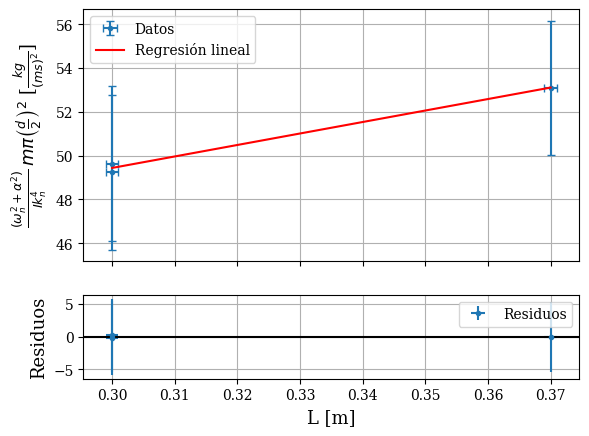

52.42576196810909
4.400900986910052


In [4]:
#Propagación del error en y: E*L

def error_eje_y(E, error_E, longitud, error_longitud):
  return ((error_E *longitud)**2 + (E*error_longitud)**2)**(1/2)

def lineal(x, m, b):
    return m * x + b

x2 = x_acero
y2 = y_acero * x_acero
xerr2 = x_acero_error
yerr2 = error_eje_y(y_acero, y_acero_error, x_acero, x_acero_error)

p_opt2, p_cov2 = curve_fit(lineal, x2, y2, sigma = yerr2)
m_optimo2 = p_opt2[0]
b_optimo2 = p_opt2[1]
b_error2 = p_cov2[1,1]**0.5
m_error2 = p_cov2[0,0]**0.5

m_optimo2, m_error2 #pendiente y error

y_predicho2 = lineal(x2,np.array(m_optimo2),np.array(b_optimo2)) #lineal
residuos2 = y2 - y_predicho2
y_predicho_error2 = np.array(m_error2, b_error2)
error_residuos2 = (yerr2**2 + y_predicho_error2**2)**(1/2)


#grafiquemos

fig, ax = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios': [3, 1]})


ax[0].errorbar(x2, y2, xerr = xerr2, yerr = yerr2, fmt = ".", capsize = 3, label = "Datos")
ax[0].errorbar(x2, y_predicho2, label="Regresión lineal", color = "red")
ax[1].errorbar(x2, residuos2, xerr = xerr2, yerr = error_residuos2, fmt = ".", label = "Residuos")

# plt.xlabel("Título x []", fontsize = 15)
# plt.ylabel("Título y []", fontsize = 15)

ax[0].set_ylabel(r"$\frac{(\omega_n^2 + \alpha^2)}{I k_n^4} \, m \pi \left(\frac{d}{2}\right)^2$ [$\frac{kg}{(m s)^2}$]", fontsize = 13)
# ax[0].set_ylabel("($\omega^2$ + $\alpha$) []", fontsize = 13)
ax[1].set_ylabel("Residuos", fontsize = 13)
ax[1].set_xlabel("L [m]", fontsize = 13)
# ax[1].set_ylim(-0.05, 0.05)

# major_ticks = np.arange(x[0], x[len(x)-1], 0.05 )
# minor_ticks = np.arange(x[0], x[len(x)-1], 0.05)

# ax[0].set_xticks(major_ticks)
# ax[0].set_xticks(minor_ticks, minor=True)
# ax[0].grid(which='minor', alpha=0.2)
# ax[0].grid(which='major', alpha=0.6)

ax[1].axhline(0, color = "black")
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()
plt.show()

m_optimo2, m_error2

print(m_optimo2)
print(m_error2)

Comparación (ploteo todo junto)

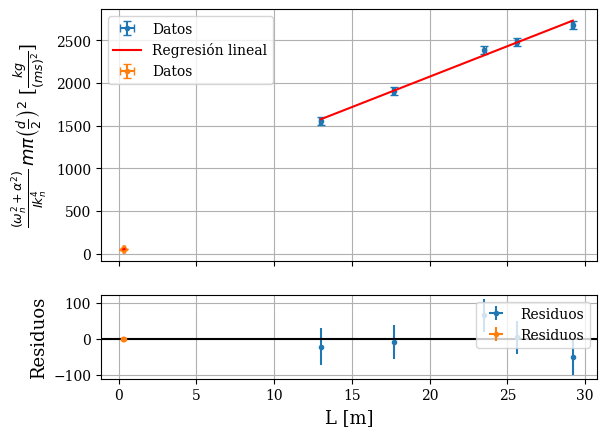

In [5]:
fig, ax = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios': [3, 1]})


ax[0].errorbar(x1, y1, xerr = xerr1, yerr = yerr1, fmt = ".", capsize = 3, label = "Datos", color = "#1f77b4")
ax[0].errorbar(x1, y_predicho1, label="Regresión lineal", color = "red")

ax[0].errorbar(x2, y2, xerr = xerr2, yerr = yerr2, fmt = ".", capsize = 3, label = "Datos", color = "#ff7f0e")
ax[0].errorbar(x2, y_predicho2, color = "red")

ax[1].errorbar(x1, residuos1, xerr = xerr1, yerr = error_residuos1, fmt = ".", label = "Residuos", color = "#1f77b4")
ax[1].errorbar(x2, residuos2, xerr = xerr2, yerr = error_residuos2, fmt = ".", label = "Residuos", color = "#ff7f0e")

# plt.xlabel("Título x []", fontsize = 15)
# plt.ylabel("Título y []", fontsize = 15)

ax[0].set_ylabel(r"$\frac{(\omega_n^2 + \alpha^2)}{I k_n^4} \, m \pi \left(\frac{d}{2}\right)^2$ [$\frac{kg}{(m s)^2}$]", fontsize = 13)
# ax[0].set_ylabel("($\omega^2$ + $\alpha$) []", fontsize = 13)
ax[1].set_ylabel("Residuos", fontsize = 13)
ax[1].set_xlabel("L [m]", fontsize = 13)
# ax[1].set_ylim(-0.05, 0.05)


ax[1].axhline(0, color = "black")
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()
plt.show()
